# Assignment 2: recommender System

## Code from the lecture

In [2]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [3]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [7]:
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])

In [72]:
def getTopN(movie_id,D,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title,D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title),D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return np.mean(userScores)

In [73]:
#split in train and test data
from sklearn.model_selection import train_test_split
R_train,R_test= train_test_split(R,test_size=0.1)

In [11]:
#train but only with training data
#again, implementation not efficient: better use lamda opperators 
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=CosineDist(R[:,i],R[:,j])

In [74]:
res_Cos_dist=test_Score(D_train,R_test)
print("The result of the Cosine distance is",res_Cos_dist)

The result of the Cosine distance is 2.3258947368421055


## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

In [19]:
#eucledian implementation
def EuclDist(a,b):
    return np.linalg.norm(a-b)

In [23]:
D_train_eucl=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train_eucl[i,j]=EuclDist(R[:,i],R[:,j])

In [26]:
res_Eucl_dist=test_Score(D_train_eucl,R_test)
print("The result of the eucledian distance is",res_Eucl_dist)

The result of the eucledian distance is 1.5936842105263163


In [27]:
#Due to the fact, that the score equals the mean number of stars given by the users to the proposed movies by the algorithm, a higher Score is better. 
#This kind of scoring implies that the Cosine distance is better than the eucledian distance.


## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

## 4.2.1 Random recommendations

In [75]:
#implement and get the score of random recommendations
#the same test dataset is used as before
def get5randmovieIDs():
    nested_list=(np.round_(np.random.rand(5,1)*(np.shape(movies)[0]-1))).tolist()
    res_id =[]
    for sublist in nested_list:
        for item in sublist:
            res_id.append(int(item))
    return res_id

def Score_byID_rand(ID, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = get5randmovieIDs()
    res_title = getNameByID(res_id)
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score_rand(R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID_rand(e, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return np.mean(userScores)

In [110]:
res_rand=test_Score_rand(R_test)
print("The resulting score while always recommending random movies is:",res_rand)

The result of the Cosine distance while always recommending random movies is: 0.19368421052631582


Due to the randomness of the proposed movies the resulting score is varying, but is still much **lower** than the results before.

## 4.2.2 Recommend always Top 5
The top 5 movies equal the movies with the highest average ratings

In [111]:
#implement and get the score when always the five movies with the highest average rating are recommandet
#the same test dataset is used as before
def getTop5movieIDs():
    return (np.argsort(np.mean(R_train,axis=0))[-5:]).tolist()

def Score_byID_Top5(ID, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTop5movieIDs()
    res_title = getNameByID(res_id)
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score_Top5(R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID_Top5(e, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return np.mean(userScores)

In [112]:
res_Top5=test_Score_Top5(R_test)
print("The resulting score while recommending always the top 5 movies is: ",res_Top5)

The result of the Cosine distance while recommending always the top 5 movies is:  2.174736842105263


While recommending always the top 5 movies the score is **almost as good as** with calculating the similarity of the movies by using the **cosine distance**

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


In [175]:
U,S,V = np.linalg.svd(D_train)

Text(0.5, 1.0, 'visualization of the singular values')

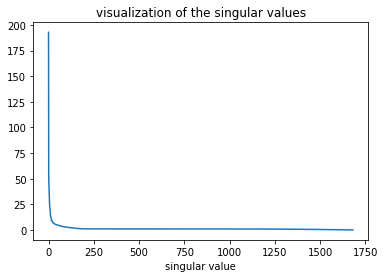

In [176]:
fig, axes = plt.subplots()
axes.plot(S)
axes.set_xlabel('singular value')
axes.set_title('visualization of the singular values')

In [249]:
#mask = np.cumsum(S) < np.sum(S)*0.3
th = 0.0075
mask = S > S.max()*th

In [250]:
mask.sum()

161

Text(0.5, 1.0, 'visualization of the singular values')

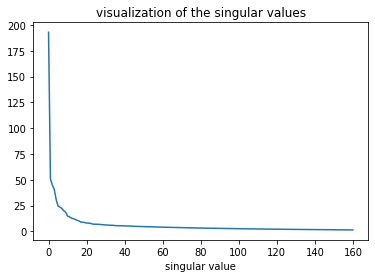

In [251]:
fig, axes = plt.subplots()
axes.plot(S[mask])
axes.set_xlabel('singular value')
axes.set_title('visualization of the singular values')

In [252]:
D_reconst=np.dot(U[:,:mask.sum()]*S[mask],V[:mask.sum(),:])

In [253]:
np.shape(D_reconst)

(1682, 1682)

In [254]:
res_SVD = test_Score(D_reconst,R_test)
print("The result score after SVD is",res_SVD)

The result score after SVD is 2.919999999999999


By varying the threshold th for the singular values the resulting score is also varying. A good value for th seems to be within 0.0075 und 0.2.
By optimizing the parameter th the resulting score of the reconstructed D matrix surpasses the score of the original D matrix.